In [14]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
# Load dataset
data = pd.read_csv("../data/cicids2017_cleaned.csv")
data.head()

# Check data types
data.info()
data.describe()

<class 'pandas.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 int64  
 17  Flow IAT Min                 int64  
 18  Fwd IAT Total                int64  
 19  Fwd IAT Mea

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
count,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,...,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06,2.520751e+06
mean,8.690744e+03,1.659032e+07,1.025880e+01,6.065243e+02,2.311993e+02,1.920377e+01,6.350189e+01,7.732029e+01,9.749253e+02,4.316019e+01,...,7.265707e+03,2.228741e+03,5.997266e+00,-3.082291e+03,9.152230e+04,1.719410e+05,6.542438e+04,9.337159e+06,9.763454e+06,8.892545e+06
std,1.901294e+04,3.523140e+07,7.943824e+02,1.011595e+04,7.563122e+02,6.079887e+01,1.955512e+02,2.968824e+02,2.038152e+03,7.088017e+01,...,1.459805e+04,8.924482e+03,6.743909e+02,1.149769e+06,6.858746e+05,1.084664e+06,6.106447e+05,2.484810e+07,2.561725e+07,2.458139e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-1.000000e+00,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.200000e+01,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,-1.000000e+00,-1.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062000e+04,2.000000e+00,6.600000e+01,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,9.700000e+01,0.000000e+00,...,2.510000e+02,0.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.332968e+06,6.000000e+00,3.320000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,7.460000e+02,8.200000e+01,...,8.192000e+03,2.350000e+02,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,1.290000e+07,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,2.896000e+03,...,6.553500e+04,6.553500e+04,2.135570e+05,1.380000e+02,1.100000e+08,1.100000e+08,1.100000e+08,1.200000e+08,1.200000e+08,1.200000e+08


In [8]:
# cleaning & encoding
df = data.copy()

# detect label column
if "Label" in df.columns:
    label_col = "Label"
elif "Attack Type" in df.columns:
    label_col = "Attack Type"
else:
    raise KeyError(f"No label column found. Available columns: {df.columns.tolist()}")

# binary target: benign/normal -> 0, attack -> 1
benign_values = {"benign", "normal traffic", "normal"}
labels_norm = df[label_col].astype(str).str.strip().str.lower()
df["target"] = np.where(labels_norm.isin(benign_values), 0, 1)

# features/target
X = df.drop([label_col, "target"], axis=1)
y = df["target"]

df["target"].value_counts()

target
0    2095057
1     425694
Name: count, dtype: int64

In [9]:
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418697
           1       1.00      0.99      1.00     85454

    accuracy                           1.00    504151
   macro avg       1.00      1.00      1.00    504151
weighted avg       1.00      1.00      1.00    504151

[[418392    305]
 [   476  84978]]


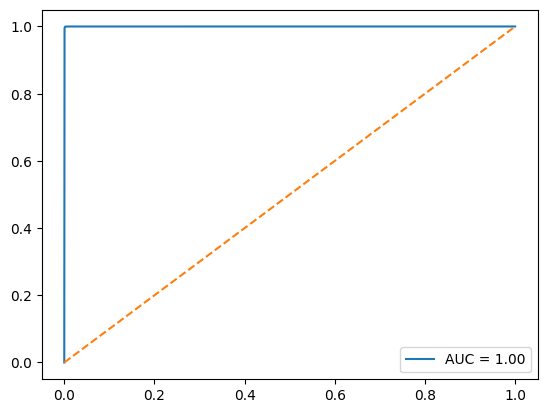

In [5]:
# supervised model (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC curve
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.legend()
plt.show()

In [15]:
# unsupervised model (Isolation Forest)
iso = IsolationForest(contamination=0.1)
iso.fit(X_train)

pred_iso = iso.predict(X_test)

# Conversion : -1 → 1 (attaque), 1 → 0 (normal)
pred_iso = [1 if x == -1 else 0 for x in pred_iso]

print(classification_report(y_test, pred_iso))
print(confusion_matrix(y_test, pred_iso))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    418697
           1       0.47      0.28      0.35     85454

    accuracy                           0.83    504151
   macro avg       0.67      0.61      0.63    504151
weighted avg       0.80      0.83      0.81    504151

[[392072  26625]
 [ 61505  23949]]


In [ ]:
# backup model
joblib.dump(rf, "../models/rf_model.pkl")

['../models/rf_model.pkl']